<a href="https://colab.research.google.com/github/Chenjing2022/Chenjing2022-Data-Analysis-and-Python/blob/main/Worksheets/10_2_Movies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movies Mini-project
---

In the previous worksheet you converted an SQL relational database to a single pandas dataframe and downloaded it. You will be analysing it today.

If you were unable to download the file, there is a copy located here: 

"https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"



### Inspect the dataset 
---

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"
movies = pd.read_csv(url )
movies

,Unnamed: 0,first_name,last_name,name,year,rank,genre
0,0,Les,12 Poissons,Rondo pour trompette,2002,NaN,Short
1,1,Lejaren,a'Hiller,"Sleep of Cyma Roget, The",1920,NaN,Drama
2,2,Khairiya,A-Mansour,Churches in Iraq,1988,NaN,Documentary
3,3,Ricardo,A. Solla,"Foto, La",2001,NaN,Drama
4,4,Ricardo,A. Solla,"Foto, La",2001,NaN,Short
...,...,...,...,...,...,...,...
368889,368889,Yusuf,Ünal,Kalbim agliyor,1988,NaN,Drama
368890,368890,Ahmet,Ündag,Ve gnese kan siradi,1972,NaN,Adventure
368891,368891,Idil,Üner,"Liebenden vom Hotel von Osman, Die",2001,8.5,Short
368892,368892,Yüksel,Ünsal,Evvel zaman iinde,1951,NaN,Animation


In [ ]:
def get_summary(movies):
  # add code below which prints the first 5 rows of the dataset, the info and the numerical summary
  return movies.head(), movies.info(), movies.describe()


get_summary(movies)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 19.7+ MB


(   Unnamed: 0 first_name    last_name                      name  year  rank  \
 0           0        Les  12 Poissons      Rondo pour trompette  2002   NaN   
 1           1    Lejaren     a'Hiller  Sleep of Cyma Roget, The  1920   NaN   
 2           2   Khairiya    A-Mansour          Churches in Iraq  1988   NaN   
 3           3    Ricardo     A. Solla                  Foto, La  2001   NaN   
 4           4    Ricardo     A. Solla                  Foto, La  2001   NaN   
 
          genre  
 0        Short  
 1        Drama  
 2  Documentary  
 3        Drama  
 4        Short  , None,           Unnamed: 0           year           rank
 count  368894.000000  368894.000000  113376.000000
 mean   184446.500000    1969.442222       5.995124
 std    106490.669438      29.082051       1.540330
 min         0.000000    1888.000000       1.000000
 25%     92223.250000    1947.000000       5.100000
 50%    184446.500000    1976.000000       6.200000
 75%    276669.750000    1996.000000    

In [ ]:
# Anthoer short way to check the number of rows and columns
movies.shape

(368894, 7)

In [ ]:
# Method 1 - to print all the columns of the Dataframe
print("Columns of the DataFrame:")
print(movies.columns)

Columns of the DataFrame:
Index(['Unnamed: 0', 'first_name', 'last_name', 'name', 'year', 'rank',
       'genre'],
      dtype='object')


In [ ]:
# Method 2 - to find all the vaiavble name of columns 
movies.columns.values

array(['Unnamed: 0', 'first_name', 'last_name', 'name', 'year', 'rank',
       'genre'], dtype=object)

### Clean the dataset 
---


In [ ]:
# To count the number of missing values in each column
movies.isnull().sum()

Unnamed: 0         0
first_name         0
last_name          0
name               0
year               0
rank          255518
genre              0
dtype: int64

In [ ]:
# To clean the null values in a cloumn in this case e,g in Rank, but not to drop the whole column as the column will be needed in this excerise 
df_drop = movies.dropna(subset=["rank"])
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113376 entries, 77 to 368891
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  113376 non-null  int64  
 1   first_name  113376 non-null  object 
 2   last_name   113376 non-null  object 
 3   name        113376 non-null  object 
 4   year        113376 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       113376 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.9+ MB


### How many movies of each genre are there?
---

In [ ]:
#To check how many movies of each in genre
genre_counts = df_drop.genre.value_counts()
print(genre_counts)

Drama          24696
Comedy         20633
Short           9894
Action          5873
Romance         5476
Thriller        5440
Family          4845
Animation       4727
Crime           4488
Documentary     4296
Horror          4227
Adventure       3932
Sci-Fi          2699
Musical         2491
Western         2364
Fantasy         2123
Mystery         2012
War             1837
Music            908
Film-Noir        415
Name: genre, dtype: int64


In [ ]:
# To verify all the list of movies in genre
index = genre_counts.index
print(index)

Index(['Drama', 'Comedy', 'Short', 'Action', 'Romance', 'Thriller', 'Family',
       'Animation', 'Crime', 'Documentary', 'Horror', 'Adventure', 'Sci-Fi',
       'Musical', 'Western', 'Fantasy', 'Mystery', 'War', 'Music',
       'Film-Noir'],
      dtype='object')


### Which director has the highest ranked movies?
---

In [ ]:
# STEP 1: creating a new variable in the dataset called "director"
df_drop["director"] = df_drop["first_name"] + " " + df_drop["last_name"]
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113376 entries, 77 to 368891
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  113376 non-null  int64  
 1   first_name  113376 non-null  object 
 2   last_name   113376 non-null  object 
 3   name        113376 non-null  object 
 4   year        113376 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       113376 non-null  object 
 7   director    113376 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 7.8+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#STEP 2: find the average ranking of each director
director_average_rank = df_drop.groupby(["director"])["rank"].mean()
director_average_rank

director
'Philthy' Phil Phillips    5.700000
A. (I) Abramov             6.900000
A. Bhimsingh               6.971429
A. Charles Addessi         4.200000
A. Dean Bell               5.333333
                             ...   
Ørjan Karlsen              8.300000
Øyvind Sandberg            8.200000
Øyvind Vennerød            5.800000
Þorvaldur Kristinsson      7.600000
Þráinn Bertelsson          6.266667
Name: rank, Length: 22104, dtype: float64

In [ ]:
#Step 3: use sort_values( ) method to sort out ranking for each director from the highest to the lowest 
director_highest_rank = df_drop.groupby("director")[["rank"]].mean().sort_values(["rank"], ascending=False)
print(director_highest_rank.head(10))

                    rank
director                
Kirsten Tretbar      9.9
Debs Tarrier         9.9
Andrew Cappelletti   9.9
Scott Barkan         9.9
Matthew Crandall     9.9
Gregg Zehentner      9.9
Arünas Zebriünas     9.9
Zack Resnicoff       9.9
Luke S. Goljan       9.8
Rubén Gámez          9.8


From the above directors we can see that eight directos have a rating of point 9.9 which is highest rating per moive in this dataset.

Reference link: https://www.analyticsvidhya.com/blog/2021/05/a-comprehensive-guide-to-data-analysis-using-pandas-hands-on-data-analysis-on-imdb-movies-data/


In [ ]:
df_drop["rank"].value_counts()

6.6    3364
6.2    3333
6.5    3201
6.4    3179
6.3    3109
       ... 
9.7      87
1.3      61
9.9      55
1.1      51
1.2      36
Name: rank, Length: 90, dtype: int64

In [ ]:
df_drop["year"].value_counts()

2002    4846
2001    4567
2003    4483
2000    4392
1999    3810
        ... 
1899      13
1902      11
1892      10
1894       5
1893       1
Name: year, Length: 113, dtype: int64

value_counts() is a quick but effective way of checking what values your variable takes. Here we see quickly that the rating score 9.9 was given 55 times!

### How many movies have ranks of over 9?

---


In [ ]:
#Count rows where column is equal to a value:
movies_counts = director_highest_rank[director_highest_rank["rank"] > 9.0]
print(movies_counts)

                      rank
director                  
Kirsten Tretbar      9.900
Debs Tarrier         9.900
Andrew Cappelletti   9.900
Scott Barkan         9.900
Matthew Crandall     9.900
...                    ...
Dinu Cocea           9.050
Guy Hocquenghem      9.050
Virgil Calotescu     9.050
Nikolaus Geyrhalter  9.050
Goran Gajic          9.025

[379 rows x 1 columns]


### Plot a bar chart of mean rank and genre
---

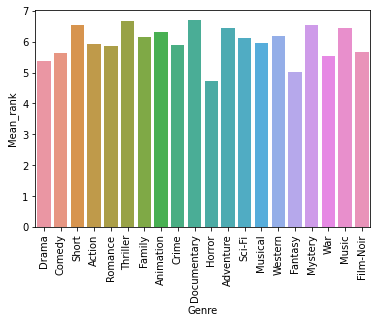

In [ ]:
data = df_drop.groupby(["genre"])["rank"].mean()
data
labels = ["Drama", "Comedy", "Short", "Action", "Romance", "Thriller", "Family",
       "Animation", "Crime", "Documentary", "Horror", "Adventure", "Sci-Fi",
       "Musical", "Western", "Fantasy", "Mystery", "War", "Music",
       "Film-Noir"]

chart = sns.barplot(x = labels, y = data)
chart.set_xlabel("Genre") 
chart.set_ylabel("Mean_rank") 
chart.set_xticklabels(labels, rotation=90)
chart;


### Plot a pie chart of how many movies of each genre there are 
---


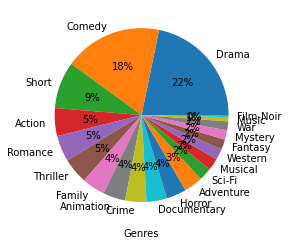

In [ ]:
genres= genre_counts.index
data = df_drop.genre.value_counts()
labels = data.keys()
labels 

plt.pie(data, labels = labels,autopct='%1.0f%%')
plt.xlabel('Genres')      
plt.show()

### Plot a graph showing the mean Rank for each year 

In [ ]:
data = df_drop.groupby(["year"])["rank"].mean()
data
#labels = df_drop["year"].unique()
labels = data.keys()

chart = sns.barplot(x = labels, y = data)

chart.set_xlabel("Year") 
chart.set_ylabel("Rank") 
chart.set_xticklabels(labels)
chart

NameError: ignored

### What else can you find out from this dataset?
---
Make a plan of 3 further things you can do to interrogate and analyse this dataset

Type your answer here  


1.  Check if there are multiple movies with the same name, and if so, determine if they are actually duplicates.
2. visual representation of the rank by using describle() method and creating a histogram chart. The hist() and describe() methods are in fact quite similar: One gives text output and the other gives its visual representation.
2.  **Check for Correlation** want to see whether two columns of a dataset are connected. create a scatter plot with those two columns: 

### Complete the tasks you have set out in the exercise above. 
---


In [ ]:
df_drop.name.duplicated().sum()

In [ ]:
df_drop.duplicated().sum

In [ ]:
df_drop.loc[df_drop.duplicated(keep = False), :]

In [ ]:
# 1. check if there are multiple movies with the same name, and if so, determine if they are actually duplicates
dupe_name = df_drop[df_drop.name.duplicated()].name
df_drop[df_drop.name.isin(dupe_name)]

From the above result there are movies with the same name, however, they are under the different in genre, the condition for dropping duplicates it will be based on what is the purpose of using the dataset. 

In [ ]:
# 2. visual representation of the rank by using describle() method and creating a histogram chart.
movies["rank"].describe()


Describle() method will display basic statisitics about rank colunms for instance in this case. From above the result it may also be able to conclude that the rating is slightly left-skewed by looking only at the text output of the .describe() method. The relevant data for this conclusion are:

- The mean is slightly smaller than the median and
- 25% of the data covers only until a rating of 5.1


In [ ]:
df_drop['rank'].hist(bins=10)

# Reflection
----

## What skills have you demonstrated in completing this notebook?

*Your* answer: Inspected and cleaned the data, applied the stastisitics and charts for analisying the data.  

## What caused you the most difficulty?

Your answers: By understanding some of the questions but aked Lila and understood this was an open mini project which was allowed us to do our own free style. I really enjoyed work throguh with this mini project. Pandas is very useful and powerful. 